# 인덱스의 실제 사용

### 인덱스 생성

In [ ]:
# 인덱스 생성
CREATE [UNIQUE] INDEX 인덱스_이름
ON 테이블_이름 (열_이름) [ASC|DESC]

### 인덱스 제거

In [ ]:
# 인덱스 제거
DROP INDEX 인덱스_이름 ON 테이블_이름

## 인덱스 생성과 제거 문법

### 인덱스 생성 문법

* 이전에 테이블을 생성할 때 특정 열을 기본 키, 고유 키로 설정하면 인덱스가 자동 생성된다는 것을 알게 되었다.
* Primary Key문법을 사용하면 클러스터형 인덱스, Unique 문법을 사용하면 보조 인덱스가 자동으로 생성되었다.
* 그 외에 직접 인덱스를 생성하려면 CREATE INDEX문을 사용해야 한다.

In [ ]:
# 인덱스 생성 문법
CREATE [UNIQUE | FULLTEXT | SPATIAL] INDEX index_mem_name
[index_type]
ON tbl_mem_name (key_part,...)
[index_option]
[algorithm_option|lock_option]

key_part: {col_mem_name [(length)] | (expr)} [ASC | DESC]

index_option:
KEY_BLOCK_SIZE [=] value
| index_type
| WITH PARSER parser_mem_name
| COMMENT 'string'
| {VISIBLE | INVISIBLE}

index_type:
USING{BTREE | HASH}

algorithm_option:
ALGORITHM [=] {DEFAULT | INPLACE | COPY}

lock_option:
LOCK [=] {DEFAULT | NONE | SHARED | EXCLUSIVE}

In [ ]:
# 실제 사용하는 문법
CREATE [UNIQUE] INDEX 인덱스_이름
On 테이블_이름 (열_이름) [ASC | DESC]

* UNIQUE는 중복이 안되는 고유 인덱스를 만드는 것, 생략하면 중복이 허용됨
* CREATE UNIQUE로 인덱스를 생성하려면 기존에 입력된 값들에 중복이 있으면 안된다. 그리고 인덱스를 생성한 후에 입력되는 데이터와도 중복될 수 없으니 신중해야 함
* 예를 들어, 회원 이름을 UNIQUE로 지정하면 향후에는 같은 이름의 회원은 입력할 수 없게 된다.
* 회원 이름은 같을 수도 있으므로 이름과 같은 성격을 가진 열에는 UNIQUE로 지정하면 안된다.
* 이와 달리 휴대폰 번호, 이메일 등은 사람마다 모두 다르기 때문에(중복되지 않기 때문에) UNIQUE로 지정해도 별 문제가 없다.

### 인덱스 제거 문법

* CREATE INDEX로 생성한 인덱스는 DROP INDEX로 제거
* 기본 키, 고유 키로 자동 생성된 인덱스는 DROP INDEX로 제거하지 못한다는 것
* ALTER TABLE문으로 기본 키나 고유 키를 제거하면 자동으로 생성된 인덱스도 제거할 수 있다.

In [ ]:
# 인덱스 제거 문법
DROP INDEX 인덱스_이름 ON 테이블_이름

#### 인덱스 제거
* 하나의 테이블에 클러스터형 인덱스와 보조 인덱스가 모두 있는 경우, 인덱스를 제거할 때는 보조 인덱스부터 제거하는 것이 더 좋다.
* 클러스터형 인덱스부터 제거하면 내부적으로 데이터가 재구성되기 때문, 또한, 인덱스가 많이 생성되어 있는 테이블의 경우 사용하지 않는 인덱스는 과감히 제거해주는 것이 좋다.
* 예를 들어 '한국의 동식물' 책에서 식물로 검색하는 경우가 없다면, 식물에 대한 찾아보기가 굳이 필요하지 않을것이다.

## 인덱스 생성과 제거 실습

### 인덱스 생성 실습

* 인터넷 마켓 데이터베이스를 생성하고 진행

In [ ]:
# 인덱스 생성 실습
USE market_db;
SELECT * FROM member;

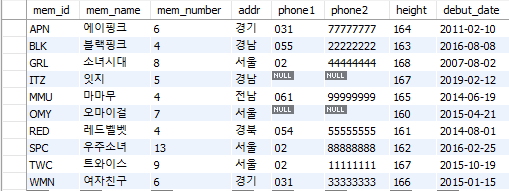

In [ ]:
# member에 어떤 인덱스가 설정되어 있는지 확인
SHOW INDEX FROM member;

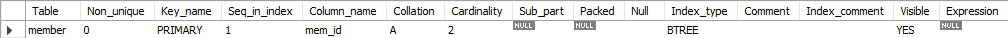

* 인덱스의 크기를 확인하고자 할 때 SHOW TABLE STATUS문을 사용한다.
* 결과 중 Data_length는 클러스터형 인덱스의 크기를 Byte 단위로 표기한 것이다.
* MySQL의 1페이지 크기는 기본적으로 16KB이므로 클러스터형 인덱스는 16384/(16*1024) = 1페이지가 할당되어 있는 것이다.
* 실제로는 데이터의 내용이 많아서 16KB까지 필요 없지만, 최소 단위가 1페이지이므로 1페이지에 해당하는 16KB가 할당되어 있는 것이다.
* Index_Length는 보조 인덱스의 크기인데 member는 보조 인덱스가 없기 때문에 표기되지 않았다.

In [ ]:
# 인덱스의 크기 확인
# SHOW TABLE STATUS는 테이블에 생성된 인덱스의 크기를 확인할 수 있다.
SHOW TABLE STATUS LIKE 'member';

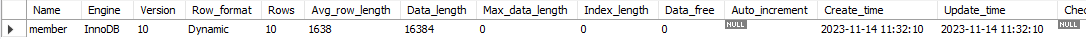

* 이미 클러스터형 인덱스가 있으므로 이 테이블에는 더 이상 클러스터형 인덱스를 생성할 수 없다.
* 주소에 중복을 허용하는 단순 보조 인덱스를 생성한다.
* 인덱스 이름을 idx_member_addr로 지정

In [ ]:
# 보조 인덱스 지정
CREATE INDEX idx_member_addr
ON member(addr);

* 새로 생성된 인덱스를 확인해본다. 지금 생성한 단순 보조 인덱스의 이름이 확인된다.
* Column_name에서는 어느 열에 지정되었는지 확인된다.
* 주의할 점은 Non_unique가 1로 설정되어 있으므로 고유 보조 인덱스가 아니라는 것이다. 즉, 중복된 데이터를 허용한다.

In [ ]:
# 새로 생성된 인덱스 확인
SHOW INDEX FROM member;

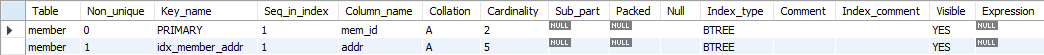

#### 클러스터형 인덱스와 보조 인덱스의 동시 사용
* 클러스터형 인덱스와 보조 인덱스가 동시에 있다는 것은 영어사전이면서 동시에 찾아보기도 존재한다는 것이다.
* 영어사전에 추가로 한글 동물, 한글 식물 단어를 찾아보기로 정리해 놓은 것으로 생각하면 된다.
* 예를 들어 영어 단어를 찾을 때는 본문(클러스터형 인덱스)을 찾으면 되고, 한글 단어(동물, 식물)를 찾을 때는 찾아보기를 이용하면 된다.

* 이제 보조 인덱스가 추가되었으므로 전체 인덱스의 크기를 다시 확인해본다.
* Index-length 부분이 보조 인덱스의 크기인데, 이상하게도 크기가 0으로 나온다.

In [ ]:
# 보조 인덱스가 추가되고 전체 인덱스의 크기를 다시 확인
SHOW TABLE STATUS LIKE 'member';

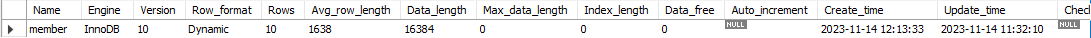

* 보조 인덱스 idx_member_addr이 생성된 것을 확인했는데, 생성한 인덱스를 실제로 적용시키려면 ANALYZE TABLE 문으로 먼저 테이블을 분석/처리해줘야 한다.

In [ ]:
# ANALYZE TABLE문으로 먼저 테이블을 분석/처리해줘야 한다
ANALYZE TABLE member;
SHOW TABLE STATUS LIKE 'member';

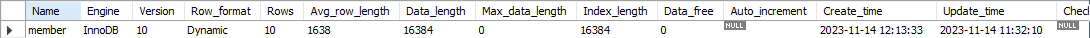

* 인원수에 중복을 허용하지 않는 고유 보조 인덱스를 생성해본다.
* 블랙핑크, 마마무, 레드벨벳의 인원수가 4이기에 이미 중복된 값이 있다. -> 인원수 열에는 고유 보조 인덱스를 생성할 수 없다.
* 고유 보조 인덱스를 생성할 수 없다.

In [ ]:
# 인원수에 중복을 허용하지 않는 고유 보조 인덱스를 생성
CREATE UNIQUE INDEX idx_member_mem_number
ON member (mem_number);

* 회원 이름에 고유 보조 인덱스를 생성해본다.

In [ ]:
# 회원 이름에 고유 보조 인덱스 생성
CREATE UNIQUE INDEX idx_member_mem_name
ON member (mem_name);

In [ ]:
# 고유 보조 인덱스 확인
# Non_unique가 0이라는 것은 중복을 허용하지 않는다는 의미, 고유 보조 인덱스가 잘 생성된 것
SHOW INDEX FROM member;

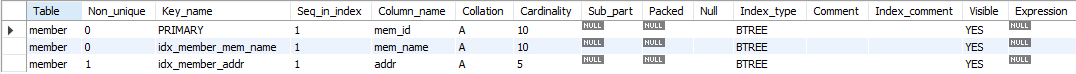

* 우연히도 마마무와 이름이 같은 태국의 가수 그룹이 회원가입을 하려고 한다고 가정하자. 회원 아이디인 기본 키만 다르면 되므로 MOO로 지정한다.
* 오류가 발생하게 되는데, 이것은 조금 전에 생성한 고유 보조 인덱스로 인해서 중복된 값을 입력할 수 없기 때문이다.

In [ ]:
# 고유 보조 인덱스로 인해서 중복된 값을 입력할 수 없는 경우
INSERT INTO member VALUES('MOO', '마마무', 2, '태국', '001', '12341234', 155, '2020.10.10');

* 이렇게 이름이 중복된다고 회원가입이 안 된다면, 실제 '인터넷 마켓'에서는 심각한 문제가 발생할 수 있다.
* 고유 보조 인덱스를 지정할 때 현재 중복된 값이 없다고 무조건 설정하면 안되며, 업무상 절대로 중복되지 않는 열(주민등록번호, 학번, 이메일 주소)에만 UNIQUE옵션을 사용해서 인덱스를 생성해야 한다.

#### 중복된 데이터가 많은 열에 인덱스 생성
* 중복된 데이터가 많은 열도 종종 있다.
* 남/여의 성별을 구분하는 열을 생각해보자. 만약 성별을 구분하는 열이 있다면 남성은 M, 여성은 F 외에는 입력할 것이 없다.
* 회원이 100만 명이라면 대략 50만 명은 M, 50만 명은 F값을 가진다.

* 아래 결과는 대략 50만 건이 나온다. 이렇게 중복된 데이터가 많은 열에 인덱스를 생성하는 것은 의미도 없고 오히려 성능에 나쁜 영향을 미친다.

In [ ]:
# 중복된 데이터가 많은 열에 인덱스 생성
SELECT * FROM 회원_테이블 WHERE 성별 = 'M';

### 인덱스의 활용 실습

* 지금까지 만든 인덱스가 어느 열에 있는지 확인해본다.
* 현재 회원 아이디, 회원이름, 주소 열에 인덱스가 생성되어 있다.

In [ ]:
# 지금까지 만든 인덱스가 어느 열에 있는지 확인
# 지금까지 만든 인덱스를 모두 적용
ANALYZE TABLE member;
SHOW INDEX FROM member;

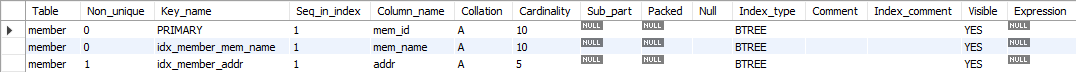

In [ ]:
# 전체 조회
SELECT * FROM member;

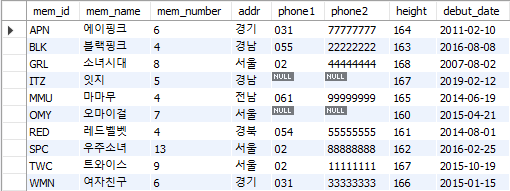

*  이 SQL은 인덱스와 아무런 상관이 없다.
*  인덱스를 사용하려면 인덱스가 생성된 열 이름이 SQL문에 있어야 한다.
*  인덱스를 사용했는지 여부는 결과 중 Execution Plan 창을 확인하면 된다.

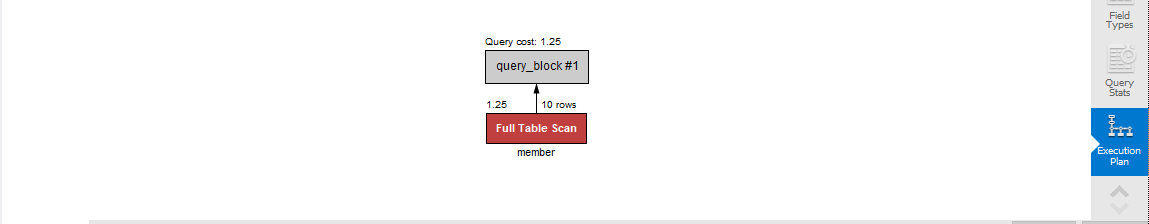

* 인덱스가 있는 열을 조회해보면 잘 되는 것을 볼 수 있다.

In [ ]:
# 인덱스가 있는 열 조회
SELECT mem_id, mem_name, addr FROM member;

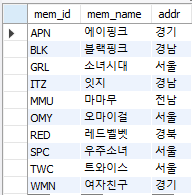

* 다시 Execution Plan창을 확인해보면 역시 전체 테이블 검색을 했을것이다. 열 이름이 SELECT 다음에 나와도 인덱스를 사용하지 않는다.

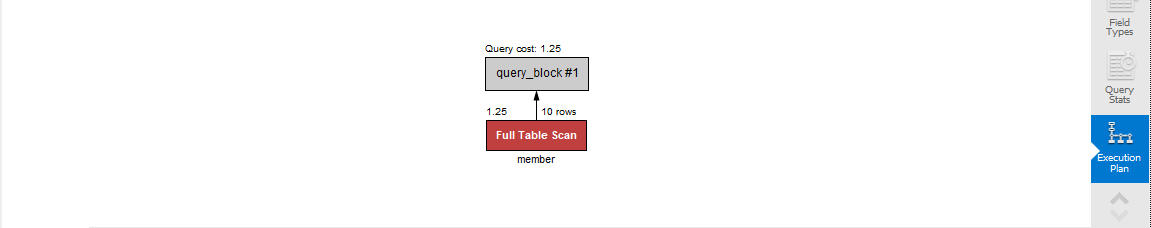

In [ ]:
# 인덱스가 생성된 mem_name 값이 '에이핑크'인 행을 조회
SELECT mem_id, mem_name, addr FROM member
WHERE mem_name = '에이핑크';

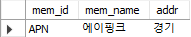

* Execution Plan창을 확인해보면 Single Row라고 되어있다. 이 용어는 인덱스를 사용해서 결과를 얻었다는 의미임
* Execution Plan창에 Full Table Scan을 제외하고, 나머지는 모두 인덱스를 사용했다는 의미
* 인덱스를 사용하는 방법이 여러 개라서 다양한 용어로 표현된다.

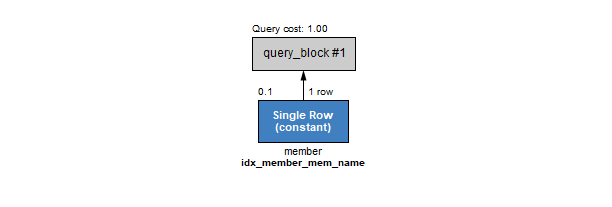

In [ ]:
# 숫자의 범위로 조회
CREATE INDEX idx_member_mem_number
ON member(mem_number);
ANALYZE TABLE member;

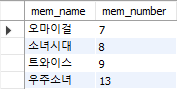

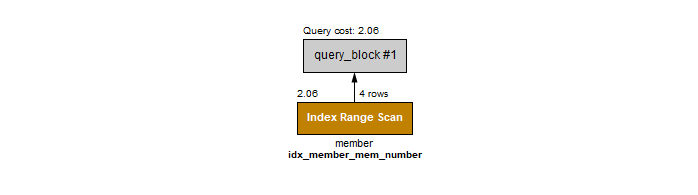

* Execution Plan창에서 인덱스를 사용한 것을 확인할 수 있다.
* mem_number >= 7과 같이 숫자의 범위로 조회하는 것도 인덱스를 사용한다.

### 인덱스를 사용하지 않을 때

* 인덱스가 있고 WHERE 절에 열 이름이 나와도 인덱스를 사용하지 않는 경우가 있다.

In [ ]:
# 인원 수가 1명 이상인 회원 조회
SELECT mem_name, mem_number
FROM member
WHERE mem_number >= 1;

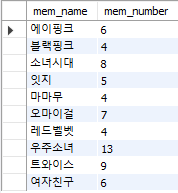

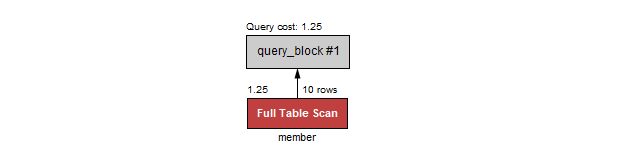

* Execution Plan창을 살펴보게 되면 전체 테이블 검색을 했다.
* 앞에서 7명 이상일 때는 틀림없이 인덱스를 사용했는데, 1명 이상으로 설정하니 전체 테이블 검색을 했다.
* 인덱스가 있더라도 MySQL이 인덱스 검색보다는 전체 테이블 검색이 낫겠다고 판단했기 때문이다.

In [ ]:
# 인원수의 2배를 하면 14명 이상이 되는 회원의 이름과 인원수를 검색
SELECT mem_name, mem_number
FROM member
WHERE mem_number*2 >= 14;

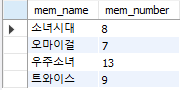

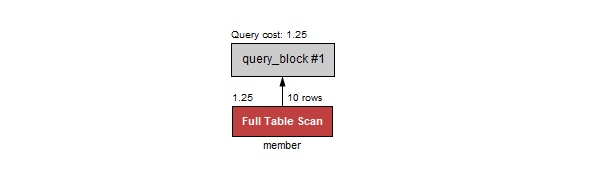

* 마찬가지로 전체 테이블 검색을 했다.
* WHERE 문에서 열에 연산이 가해지면 인덱스를 사용하지 않는다.

In [ ]:
# 다음과 같이 수정하면 결과는 동일하게 나온다
SELECT mem_name, mem_number
FROM member
WHERE mem_number >= 14/2;

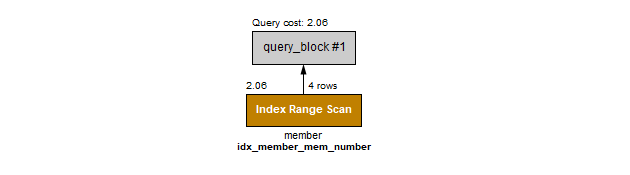

* Execution Plan을 살펴보면 인덱스를 사용하지 않는다. 따라서 WHERE 절에 나온 열에는 아무런 연산을 하지 않는 것이 좋다.

### 인덱스 제거 실습

In [ ]:
SHOW INDEX FROM member;

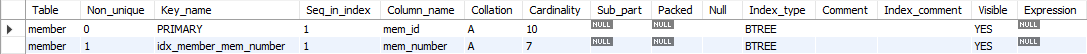

* 클러스터형 인덱스와 보조 인덱스가 섞여 있을 때는 보조 인덱스를 먼저 제거하는 것이 좋다.
* 보조 인덱스는 어떤 것을 먼저 제거해도 상관없다.

In [ ]:
# 보조 인덱스 제거
# 주석 2개는 코드 초기화로 인해 인덱스 생성을 생략했음
# DROP INDEX idx_member_mem_name ON member;
# DROP INDEX idx_member_addr ON member;
DROP INDEX idx_member_mem_number ON member;

* 마지막으로 기본 키 지정으로 자동 생성된 클러스터형 인덱스를 제거하면 된다.

In [ ]:
# Primary Key에 설정된 인덱스는 ALTER TABLE문으로만 제거할 수 있다
ALTER TABLE member
DROP PRIMARY KEY;

* 오류가 발생한다. 이유는 member의 mem_id열을 buy가 참조하고 있기 때문이다.
* 그러므로 기본 키를 제거하기 전에 외래 키 관계를 제거해야 한다.

* 테이블에는 여러 개의 외래 키가 있을 수 있다. 그래서 먼저 외래 키의 이름을 알아야 한다.
* information_schema 데이터베이스의 referential_constraints 테이블을 조회하면 외래 키의 이름을 알 수 있다.

In [ ]:
# 외래 키 이름 확인
SELECT table_name, constraint_name
FROM information_schema.referential_constraints
WHERE constraint_schema = 'market_db';

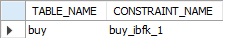

* 외래 키 이름을 알았으니 외래 키를 먼저 제거하고 기본 키를 제거하면 된다.
* 이제 모든 인덱스를 제거했다.

In [ ]:
# 외래 키 인덱스 제거
ALTER TABLE buy
DROP FOREIGN KEY buy_ibfk_1;
ALTER TABLE member
DROP PRIMARY KEY;

* 인덱스를 제거한다고 데이터의 내용이 바뀌는 것은 아니다. 지금 인덱스를 제거한 것은 찾아보기를 제거하고 영어사전을 순서가 섞인 단어장으로 변경한 것이며 내용은 그대로이다.

## 인덱스를 효과적으로 사용하는 방법

### 인덱스는 열 단위에 생성된다.
* 하나의 열에 2개 이상의 인덱스를 만들 수도 있고, 2개 이상의 열을 묶어서 하나의 인덱스로 만들 수 있다.
* 하지만 이런 경우는 드물기 때문에 하나의 열에 하나의 인덱스를 만드는 것이 가장 일반적이다.

### WHERE 절에서 사용되는 열에 인덱스를 만들어야 한다.
* SELECT 문을 사용할 때, WHERE절의 조건에 해당 열이 나와야 인덱스를 사용한다.
* market_db의 member를 사용하는 SQL은 다음과 같다.

In [ ]:
SELECT mem_id, mem_name, mem_number, addr
FROM member
WHERE mem_name = '에이핑크';

* 만약 member 테이블에는 단지 SQL만 사용한다고 가정하면, 이 SQL에서 mem_id, mem_number, addr열에는 인덱스를 생성해도 전혀 사용하지 않는다.
* WHERE 절에 있는 mem_name 열의 인덱스만 사용한다. 그러므로 mem_name 열 외에 다른 열에 인덱스를 만드는 것은 낭비가 된다.

### WHERE 절에 사용되더라도 자주 사용해야 가치가 있다.
* 만약 mem_name 열에 인덱스를 생성해서 효율이 아주 좋아진다고 하더라도, 이 SELECT 문은 1년에 1먼 정도만 사용되고 member 테이블에는 주로 INSERT 작업만 일어나게 된다면 오히려 인덱스로 인해 성능이 나빠질 것이다.
* 차라리 1년에 1번쯤 인덱스 없이 SELECT를 하는 것이 더 낫다.

### 데이터의 중복이 높은 열은 인덱스를 만들어도 별 효과가 없다.
* 열에 들어갈 데이터의 종류가 몇 가지 되지 않으면 인덱스가 큰 효과를 내지 못한다.

### 클러스터형 인덱스는 테이블당 하나만 생성할 수 있다.
* 클러스터형 인덱스는 데이터 페이지를 읽는 수가 보조 인덱스보다 적기 때문에 성능이 더 우수하다.
* 하나밖에 지정하지 못하는 클러스터형 인덱스(기본 키)는 조회할 때 가장 많이 사용되는 열에 지정하는 것이 효과적임

### 사용하지 않는 인덱스는 제거한다.
* 실제로 사용되는 SQL을 분석해서 WHERE 조건에서 사용되지 않는 열의 인덱스는 제거할 필요가 있다.
* 공간을 확보할 수 있으며 데이터 입력 시 발생되는 부하도 많이 줄일 수 있다.